# Prediction Model - Hujan di Australia
---

Nama Siswa : Nurpadila Aco

# Ulasan Tugas
---
## Sumber data
Data yang digunakan dalam proyek ini diunduh dari kumpulan data Kaggle berjudul [Rain in Australia](https://www.kaggle.com/jsphyg/weather-dataset-rattle-package), yang aslinya bersumber dari Australian Bureau of [Pengamatan Cuaca Harian] Meteorologi(http://www.bom.gov.au/climate/dwo/). Metrik cuaca tambahan untuk Australia dapat ditemukan dalam aplikasi web [Climate Data Online](http://www.bom.gov.au/climate/data/).

## Masalah
Cuaca, dan kemampuan manusia untuk memprediksinya secara akurat, memainkan peran penting dalam banyak aspek kehidupan. Mulai dari petani yang bercocok tanam hingga keluarga yang merencanakan liburan akhir pekan hingga pengambilan keputusan logistik di maskapai penerbangan, hujan khususnya sangat berpengaruh terhadap rencana. Dalam beberapa kasus, dampak hujan dapat menimbulkan konsekuensi finansial yang besar. Oleh karena itu, terdapat minat yang kuat dari banyak pemangku kepentingan terhadap kemampuan meramalkan hujan secara akurat. Tujuan dari proyek ini adalah menggunakan data yang tersedia untuk membuat model prediksi hari berikutnya apakah akan turun hujan atau tidak. Model seperti itu dapat digunakan dalam aplikasi cuaca untuk kepentingan masyarakat luas.

### Hubungkan ke Drive

In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


# Imports & Settings
---

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

from sklearn.experimental import enable_iterative_imputer
from sklearn.impute import IterativeImputer
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.metrics import confusion_matrix
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.linear_model import LogisticRegression
from imblearn.over_sampling import SMOTE

from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from xgboost import XGBClassifier

import joblib
import warnings
warnings.filterwarnings('ignore')

In [3]:
# Setting the default styling attributes for seaborn
sns.set_theme(style='darkgrid')

In [4]:
%cd '/content/drive/MyDrive/Colab Notebooks'

/content/drive/MyDrive/Colab Notebooks


In [5]:
# Loading in the dataset
df = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/weatherAUS.csv')

# Exploratory Data Analysis
---

## Data Preview

In [6]:
df.head()

,Date,Location,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustDir,WindGustSpeed,WindDir9am,...,Humidity9am,Humidity3pm,Pressure9am,Pressure3pm,Cloud9am,Cloud3pm,Temp9am,Temp3pm,RainToday,RainTomorrow
0,2008-12-01,Albury,13.4,22.9,0.6,NaN,NaN,W,44.0,W,...,71.0,22.0,1007.7,1007.1,8.0,NaN,16.9,21.8,No,No
1,2008-12-02,Albury,7.4,25.1,0.0,NaN,NaN,WNW,44.0,NNW,...,44.0,25.0,1010.6,1007.8,NaN,NaN,17.2,24.3,No,No
2,2008-12-03,Albury,12.9,25.7,0.0,NaN,NaN,WSW,46.0,W,...,38.0,30.0,1007.6,1008.7,NaN,2.0,21.0,23.2,No,No
3,2008-12-04,Albury,9.2,28.0,0.0,NaN,NaN,NE,24.0,SE,...,45.0,16.0,1017.6,1012.8,NaN,NaN,18.1,26.5,No,No
4,2008-12-05,Albury,17.5,32.3,1.0,NaN,NaN,W,41.0,ENE,...,82.0,33.0,1010.8,1006.0,7.0,8.0,17.8,29.7,No,No


In [7]:
df.columns

Index(['Date', 'Location', 'MinTemp', 'MaxTemp', 'Rainfall', 'Evaporation',
       'Sunshine', 'WindGustDir', 'WindGustSpeed', 'WindDir9am', 'WindDir3pm',
       'WindSpeed9am', 'WindSpeed3pm', 'Humidity9am', 'Humidity3pm',
       'Pressure9am', 'Pressure3pm', 'Cloud9am', 'Cloud3pm', 'Temp9am',
       'Temp3pm', 'RainToday', 'RainTomorrow'],
      dtype='object')

## Column Definitions
Menurut penulis kumpulan data Kaggle dan ["Catatan untuk menemani Pengamatan Cuaca Harian"](http://www.bom.gov.au/climate/dwo/IDCJDW0000.shtml) yang diterbitkan oleh Biro Meteorologi Australia, arti dan satuan masing-masing kolom pada dataset adalah sebagai berikut:

| **Column Name** | **Definition** | **Units** |
| --------------- | -------------- | --------- |
| `Date` | Date of the observation | N/A |
| `Location` | Location of the weather station | N/A |
| `MinTemp` | Minimum temperature in the 24 hours to 9am. Sometimes only known to the nearest whole degree | Degrees Celsius |
| `MaxTemp` | Maximum temperature in the 24 hours to 9am. Sometimes only known to the nearest whole degree | Degrees Celsius |
| `Rainfall` | Precipitation (rainfall) in the 24 hours to 9am. Sometimes only known to the nearest whole millimeter | Millimeters |
| `Evaporation` | "Class A" pan evaporation in the 24 hours to 9am | Millimeters |
| `Sunshine` | Bright sunshine in the 24 hours to midnight | Hours |
| `WindGustDir` | Direction of the strongest wind gust in the 24 hours to midnight | 16 compass points |
| `WindGustSpeed` | Speed of the strongest wind gust in the 24 hours to midnight | Kilometers per hour |
| `WindDir9am` | Direction of the wind at 9am | 16 compass points |
| `WindDir3pm` | Direction of the wind at 3pm | 16 compass points |
| `WindSpeed9am` | Speed of the wind at 9am | Kilometers per hour |
| `WindSpeed3pm` | Speed of the wind at 3pm | Kilometers per hour |
| `Humidity9am` | Relative humidity at 9am | Percent |
| `Humidity3pm` | Relative humidity at 3pm | Percent |
| `Pressure9am` | Atmospheric pressure reduced to mean sea level at 9am | Hectopascals |
| `Pressure3pm` | Atmospheric pressure reduced to mean sea level at 3pm | Hectopascals |
| `Cloud9am` | Fraction of sky obscured by cloud at 9am | Eighths |
| `Cloud3pm` | Fraction of sky obscured by cloud at 3pm | Eighths |
| `Temp9am` | Temparature at 9am | Degrees Celsius |
| `Temp3pm` | Temparature at 3am | Degrees Celsius |
| `RainToday` | Did the current day receive precipitation exceeding 1mm in the 24 hours to 9am | Binary (0 = No, 1 = Yes) |
| `RainTomorrow` | Did the next day receive precipitation exceeding 1mm in the 24 hours to 9am | Binary (0 = No, 1 = Yes) |

## Exploration

### Lihat info dataframe

In [25]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 145460 entries, 0 to 145459
Data columns (total 23 columns):
 #   Column         Non-Null Count   Dtype  
---  ------         --------------   -----  
 0   Date           145460 non-null  object 
 1   Location       145460 non-null  object 
 2   MinTemp        143975 non-null  float64
 3   MaxTemp        144199 non-null  float64
 4   Rainfall       142199 non-null  float64
 5   Evaporation    82670 non-null   float64
 6   Sunshine       75625 non-null   float64
 7   WindGustDir    135134 non-null  object 
 8   WindGustSpeed  135197 non-null  float64
 9   WindDir9am     134894 non-null  object 
 10  WindDir3pm     141232 non-null  object 
 11  WindSpeed9am   143693 non-null  float64
 12  WindSpeed3pm   142398 non-null  float64
 13  Humidity9am    142806 non-null  float64
 14  Humidity3pm    140953 non-null  float64
 15  Pressure9am    130395 non-null  float64
 16  Pressure3pm    130432 non-null  float64
 17  Cloud9am       89572 non-null

**Pengamatan:**
- Kolom `Date` perlu dikonversi ke tipe data datetime
- Tipe data untuk semua kolom lainnya terlihat bagus seperti apa adanya
- Tampaknya ada banyak nilai yang hilang di beberapa kolom

Lihat jumlah nilai yang hilang per kolom:

In [9]:
round(df.isna().sum() / len(df), 3)

Date             0.000
Location         0.000
MinTemp          0.010
MaxTemp          0.009
Rainfall         0.022
Evaporation      0.432
Sunshine         0.480
WindGustDir      0.071
WindGustSpeed    0.071
WindDir9am       0.073
WindDir3pm       0.029
WindSpeed9am     0.012
WindSpeed3pm     0.021
Humidity9am      0.018
Humidity3pm      0.031
Pressure9am      0.104
Pressure3pm      0.103
Cloud9am         0.384
Cloud3pm         0.408
Temp9am          0.012
Temp3pm          0.025
RainToday        0.022
RainTomorrow     0.022
dtype: float64

**Pengamatan:**
- `Evaporation`, `Sunshine`, `Cloud9am`, and `Cloud3pm` semuanya kehilangan lebih dari 35% nilainya
- Selain `Date` dan `Location`, semua kolom kehilangan setidaknya beberapa nilai
- Nilai yang hilang ini dapat ditangani dengan menghapus kolom/baris tertentu, memasukkan nilai, atau campuran keduanya

Selanjutnya, lihatlah beberapa ringkasan statistik:

In [10]:
df.describe()

,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustSpeed,WindSpeed9am,WindSpeed3pm,Humidity9am,Humidity3pm,Pressure9am,Pressure3pm,Cloud9am,Cloud3pm,Temp9am,Temp3pm
count,143975.000000,144199.000000,142199.000000,82670.000000,75625.000000,135197.000000,143693.000000,142398.000000,142806.000000,140953.000000,130395.00000,130432.000000,89572.000000,86102.000000,143693.000000,141851.00000
mean,12.194034,23.221348,2.360918,5.468232,7.611178,40.035230,14.043426,18.662657,68.880831,51.539116,1017.64994,1015.255889,4.447461,4.509930,16.990631,21.68339
std,6.398495,7.119049,8.478060,4.193704,3.785483,13.607062,8.915375,8.809800,19.029164,20.795902,7.10653,7.037414,2.887159,2.720357,6.488753,6.93665
min,-8.500000,-4.800000,0.000000,0.000000,0.000000,6.000000,0.000000,0.000000,0.000000,0.000000,980.50000,977.100000,0.000000,0.000000,-7.200000,-5.40000
25%,7.600000,17.900000,0.000000,2.600000,4.800000,31.000000,7.000000,13.000000,57.000000,37.000000,1012.90000,1010.400000,1.000000,2.000000,12.300000,16.60000
50%,12.000000,22.600000,0.000000,4.800000,8.400000,39.000000,13.000000,19.000000,70.000000,52.000000,1017.60000,1015.200000,5.000000,5.000000,16.700000,21.10000
75%,16.900000,28.200000,0.800000,7.400000,10.600000,48.000000,19.000000,24.000000,83.000000,66.000000,1022.40000,1020.000000,7.000000,7.000000,21.600000,26.40000
max,33.900000,48.100000,371.000000,145.000000,14.500000,135.000000,130.000000,87.000000,100.000000,100.000000,1041.00000,1039.600000,9.000000,9.000000,40.200000,46.70000


**Pengamatan:**
- Beberapa kolom memiliki pencilan yang jelas (misalnya, nilai `Rainfall` maksimum adalah 371,0 meskipun persentil ke-75 adalah 0,8)
- Tidak melihat nilai yang perlu dikhawatirkan (seperti nilai negatif untuk `Rainfall` minimum)

Untuk mendapatkan gambaran yang lebih baik tentang data dan menangkap nilai *placeholder* yang mungkin tidak muncul di statistik ringkasan, lakukan pememeriksaan lima nilai yang paling sering muncul untuk setiap kolom.

In [11]:
for col in df.columns:
    print('\n')
    print(col)
    print('-'*15)
    print(df[col].value_counts(normalize=True).head())



Date
---------------
2013-11-12    0.000337
2014-09-01    0.000337
2014-08-23    0.000337
2014-08-24    0.000337
2014-08-25    0.000337
Name: Date, dtype: float64


Location
---------------
Canberra     0.023622
Sydney       0.022989
Darwin       0.021951
Melbourne    0.021951
Brisbane     0.021951
Name: Location, dtype: float64


MinTemp
---------------
11.0    0.006244
10.2    0.006237
9.6     0.006223
10.5    0.006140
9.0     0.006057
Name: MinTemp, dtype: float64


MaxTemp
---------------
20.0    0.006137
19.0    0.005846
19.8    0.005825
20.4    0.005784
19.9    0.005707
Name: MaxTemp, dtype: float64


Rainfall
---------------
0.0    0.640511
0.2    0.061611
0.4    0.026597
0.6    0.018228
0.8    0.014459
Name: Rainfall, dtype: float64


Evaporation
---------------
4.0    0.040390
8.0    0.031559
2.2    0.025342
2.0    0.024580
2.4    0.024229
Name: Evaporation, dtype: float64


Sunshine
---------------
0.0     0.031193
10.7    0.014559
11.0    0.014466
10.8    0.014136
10.5    

**Pengamatan:**
- Jumlah nilai dari kolom `Date` perlu ditelusuri lebih lanjut dengan dasar yang tidak dinormalisasi
- Terdapat perbedaan antara jumlah nilai `Rainfall` dengan jumlah nilai `RainToday` / `RainTomorrow`. Sementara sekitar 64% pengamatan memiliki nilai 0 untuk `Rainfall`, sekitar 77,5% hari tidak memiliki curah hujan menurut dua kolom yang terakhir. Perbedaan ini kemungkinan disebabkan oleh perbedaan jumlah nilai yang hilang untuk setiap kolom
- Kolom `RainToday` dan `RainTomorrow` harus dikonversi menjadi 0 dan 1 untuk memudahkan manipulasi

Menjelajahi kolom `Date` lebih lanjut:

In [12]:
df.Date.value_counts()

2013-11-12    49
2014-09-01    49
2014-08-23    49
2014-08-24    49
2014-08-25    49
              ..
2007-11-29     1
2007-11-28     1
2007-11-27     1
2007-11-26     1
2008-01-31     1
Name: Date, Length: 3436, dtype: int64

In [13]:
df.Location.nunique()

49

Jumlah maksimum pengamatan untuk tanggal tertentu sesuai dengan jumlah lokasi unik dalam kumpulan data. Hal ini secara intuitif masuk akal karena setiap stasiun cuaca di lokasi yang berbeda akan melaporkan datanya sendiri-sendiri untuk hari tertentu.

Menyesuaikan kolom `RainToday` dan `RainTomorrow`:

In [14]:
df.RainToday = df.RainToday.map({'No': 0, 'Yes': 1})
df.RainToday.value_counts(normalize=True)

0.0    0.775807
1.0    0.224193
Name: RainToday, dtype: float64

In [15]:
df.RainTomorrow = df.RainTomorrow.map({'No': 0, 'Yes': 1})
df.RainTomorrow.value_counts(normalize=True)

0.0    0.775819
1.0    0.224181
Name: RainTomorrow, dtype: float64

### Histograms

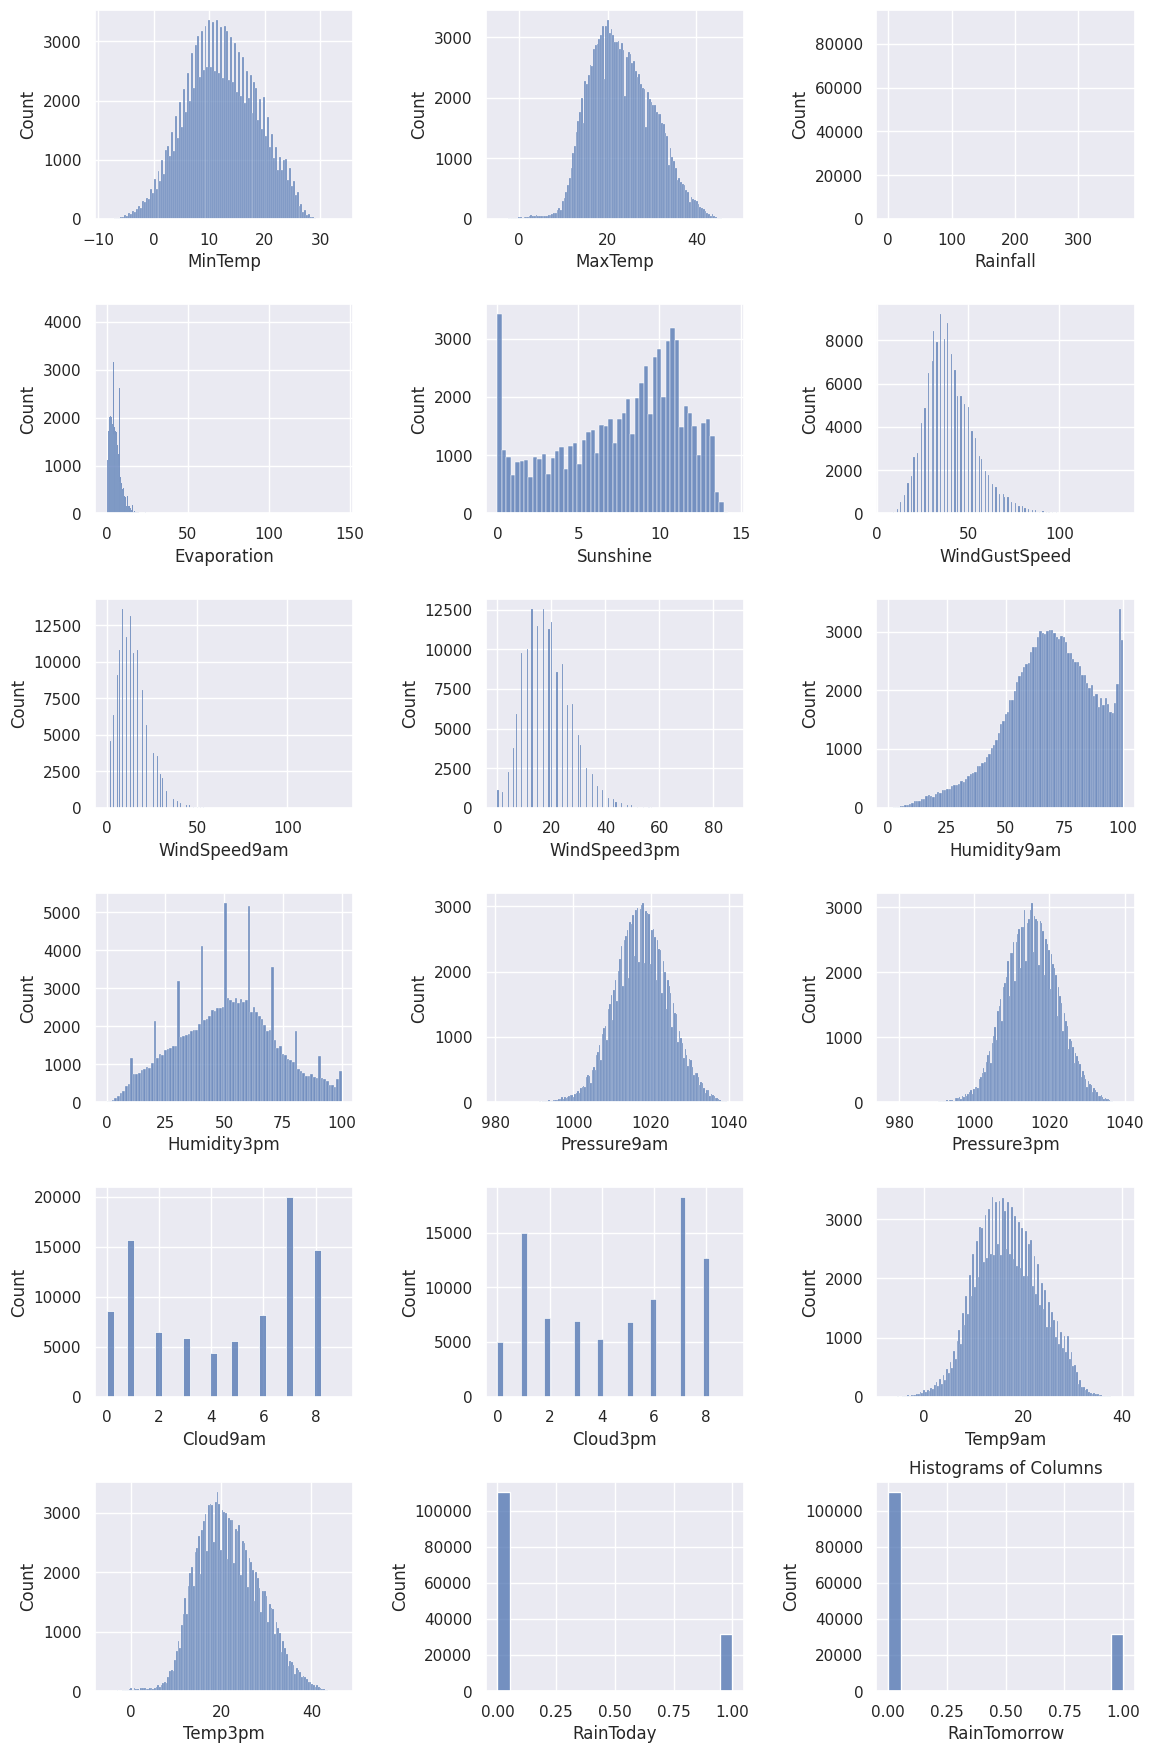

In [16]:
fig, axes = plt.subplots(nrows=6, ncols=3, figsize=(12, 18))
axes = axes.reshape(-1)

continuous = [col for col in df.columns if df[col].dtype != object]
for i, col in enumerate(continuous):
    sns.histplot(df[col], ax=axes[i])

fig.tight_layout(pad=2.0)
plt.title('Histograms of Columns')
plt.savefig('images/histograms.png', facecolor='white', dpi=100);

**Pengamatan:**
- Sebagian besar fitur terdistribusi secara normal seperti yang diharapkan
- Distribusi `Hujan` membutuhkan investigasi lebih lanjut karena pencilan yang besar kemungkinan besar mempengaruhi kemampuan untuk memplot data
- Distribusi `Sinar Matahari` menarik tetapi sebagian besar dapat dijelaskan:
    - Frekuensi tinggi dari nilai 0 menunjukkan hari-hari di mana cuaca mendung sepanjang hari
    - Penurunan frekuensi yang tiba-tiba setelah sekitar 11 jam merupakan cerminan dari jumlah hari yang terbatas dalam setahun di mana cahaya matahari tidak bersinar selama berjam-jam atau lebih.
- Distribusi `Kelembaban9 pagi` sangat menarik karena lonjakan frekuensi yang besar mendekati 100%.

Karena bagian ringkasan statistik menunjukkan bahwa persentil ke-75 untuk fitur `Curah Hujan` hanya 0,8, plot berikut menunjukkan distribusi nilai antara 0 dan 1.

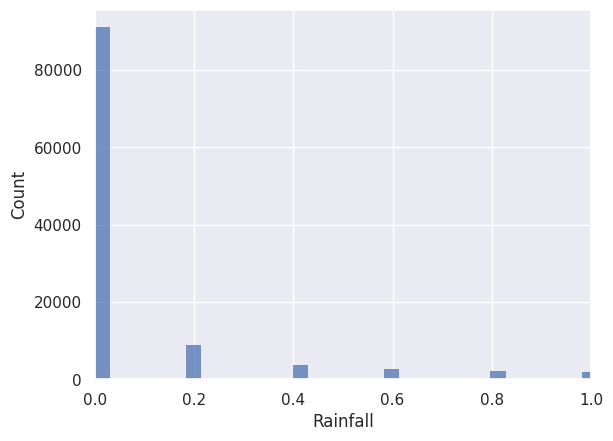

In [17]:
sns.histplot(df.Rainfall)
plt.xlim(0, 1);

### Hari Hujan berdasarkan Lokasi

In [18]:
df_rain_by_loc = df.groupby(by='Location').sum()
df_rain_by_loc = df_rain_by_loc[['RainToday']]
df_rain_by_loc.head()

,RainToday
Location,
Adelaide,689.0
Albany,902.0
Albury,617.0
AliceSprings,244.0
BadgerysCreek,583.0


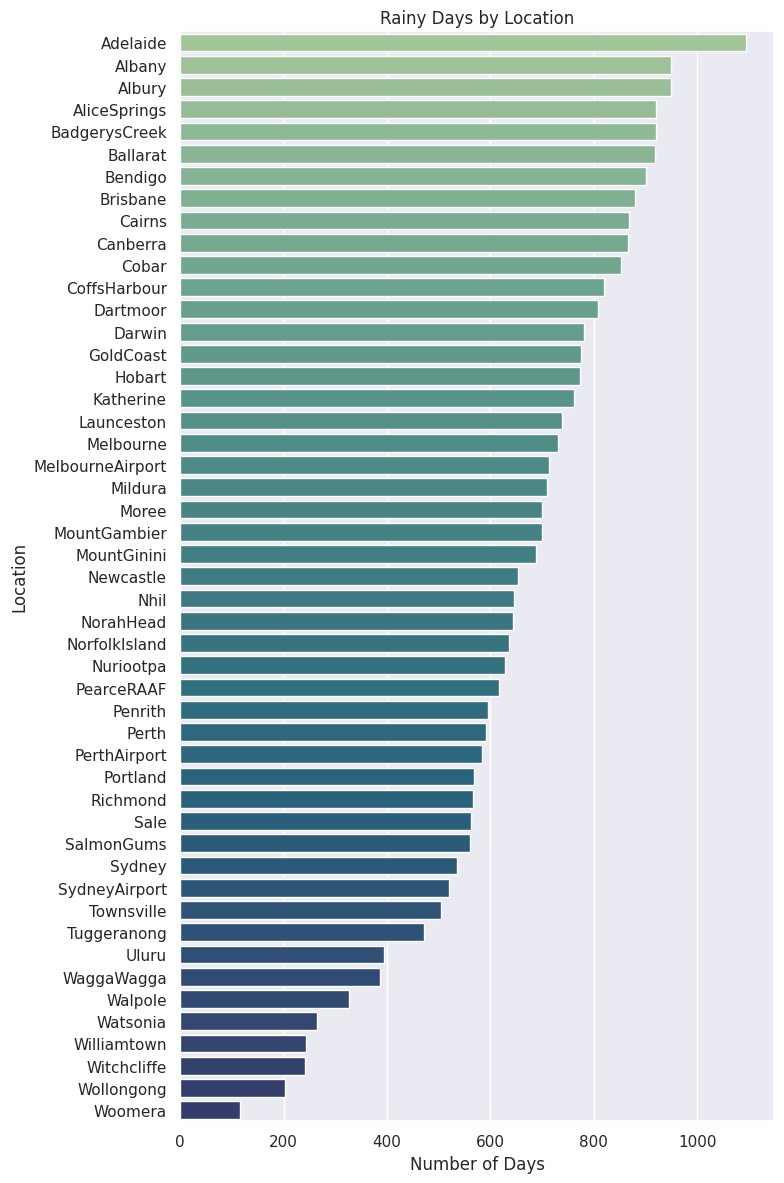

In [19]:
plt.figure(figsize=(8, 12))
sns.barplot(x='RainToday',
            y=df_rain_by_loc.index,
            data=df_rain_by_loc.sort_values('RainToday', ascending=False),
            orient='h',
            palette='crest'
           )
plt.xlabel('Number of Days')
plt.title('Rainy Days by Location')
plt.tight_layout()
plt.savefig('images/rainy_days_by_loc.png', facecolor='white', dpi=100);

Grafik di atas berguna untuk memeriksa secara cepat perbedaan antara lokasi-lokasi dalam hal jumlah hari hujan, namun memiliki satu masalah utama: jumlah pengamatan dari setiap lokasi tidak sama persis. Memeriksa jumlah nilai untuk setiap lokasi (di bawah) menunjukkan bahwa lokasi `Katherine`, `Nhil`, dan `Uluru` harus diabaikan ketika menganalisis plot di atas. Lokasi lainnya memiliki jumlah nilai yang cukup dekat untuk dapat dibandingkan.

In [20]:
df.Location.value_counts()

Canberra            3436
Sydney              3344
Darwin              3193
Melbourne           3193
Brisbane            3193
Adelaide            3193
Perth               3193
Hobart              3193
Albany              3040
MountGambier        3040
Ballarat            3040
Townsville          3040
GoldCoast           3040
Cairns              3040
Launceston          3040
AliceSprings        3040
Bendigo             3040
Albury              3040
MountGinini         3040
Wollongong          3040
Newcastle           3039
Tuggeranong         3039
Penrith             3039
Woomera             3009
Nuriootpa           3009
Cobar               3009
CoffsHarbour        3009
Moree               3009
Sale                3009
PerthAirport        3009
PearceRAAF          3009
Witchcliffe         3009
BadgerysCreek       3009
Mildura             3009
NorfolkIsland       3009
MelbourneAirport    3009
Richmond            3009
SydneyAirport       3009
WaggaWagga          3009
Williamtown         3009


### Seasonality
Curah hujan menunjukkan musim di banyak wilayah di dunia. Dengan mengelompokkan data berdasarkan bulan dalam setahun, persentase hari hujan pada bulan tertentu dapat dengan mudah dihitung. Segala jenis tren akan menunjukkan bahwa bulan dalam setahun merupakan informasi yang berharga untuk tujuan pemodelan.

In [21]:
df_seasonality = df.copy()
df_seasonality['month'] = df_seasonality.Date.apply(lambda x: int(str(x)[5:7]))
df_seasonality[['Date', 'month']].head()

,Date,month
0,2008-12-01,12
1,2008-12-02,12
2,2008-12-03,12
3,2008-12-04,12
4,2008-12-05,12


In [22]:
df_seasonality_grouped = df_seasonality.groupby('month').mean()
df_seasonality_grouped[['RainToday']]

,RainToday
month,
1,0.189484
2,0.206746
3,0.217135
4,0.216845
5,0.222163
6,0.263638
7,0.270736
8,0.253167
9,0.229135


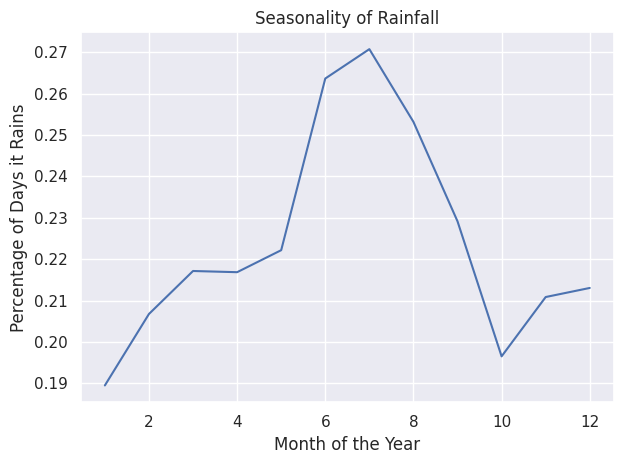

In [23]:
sns.lineplot(data=df_seasonality_grouped, x=df_seasonality_grouped.index, y='RainToday')
plt.title('Seasonality of Rainfall')
plt.xlabel('Month of the Year')
plt.ylabel('Percentage of Days it Rains')
plt.tight_layout()
plt.savefig('images/seasonality.png', facecolor='white', dpi=100);

Curah hujan di Australia jelas memiliki tingkat musiman.

### Correlation Matrix

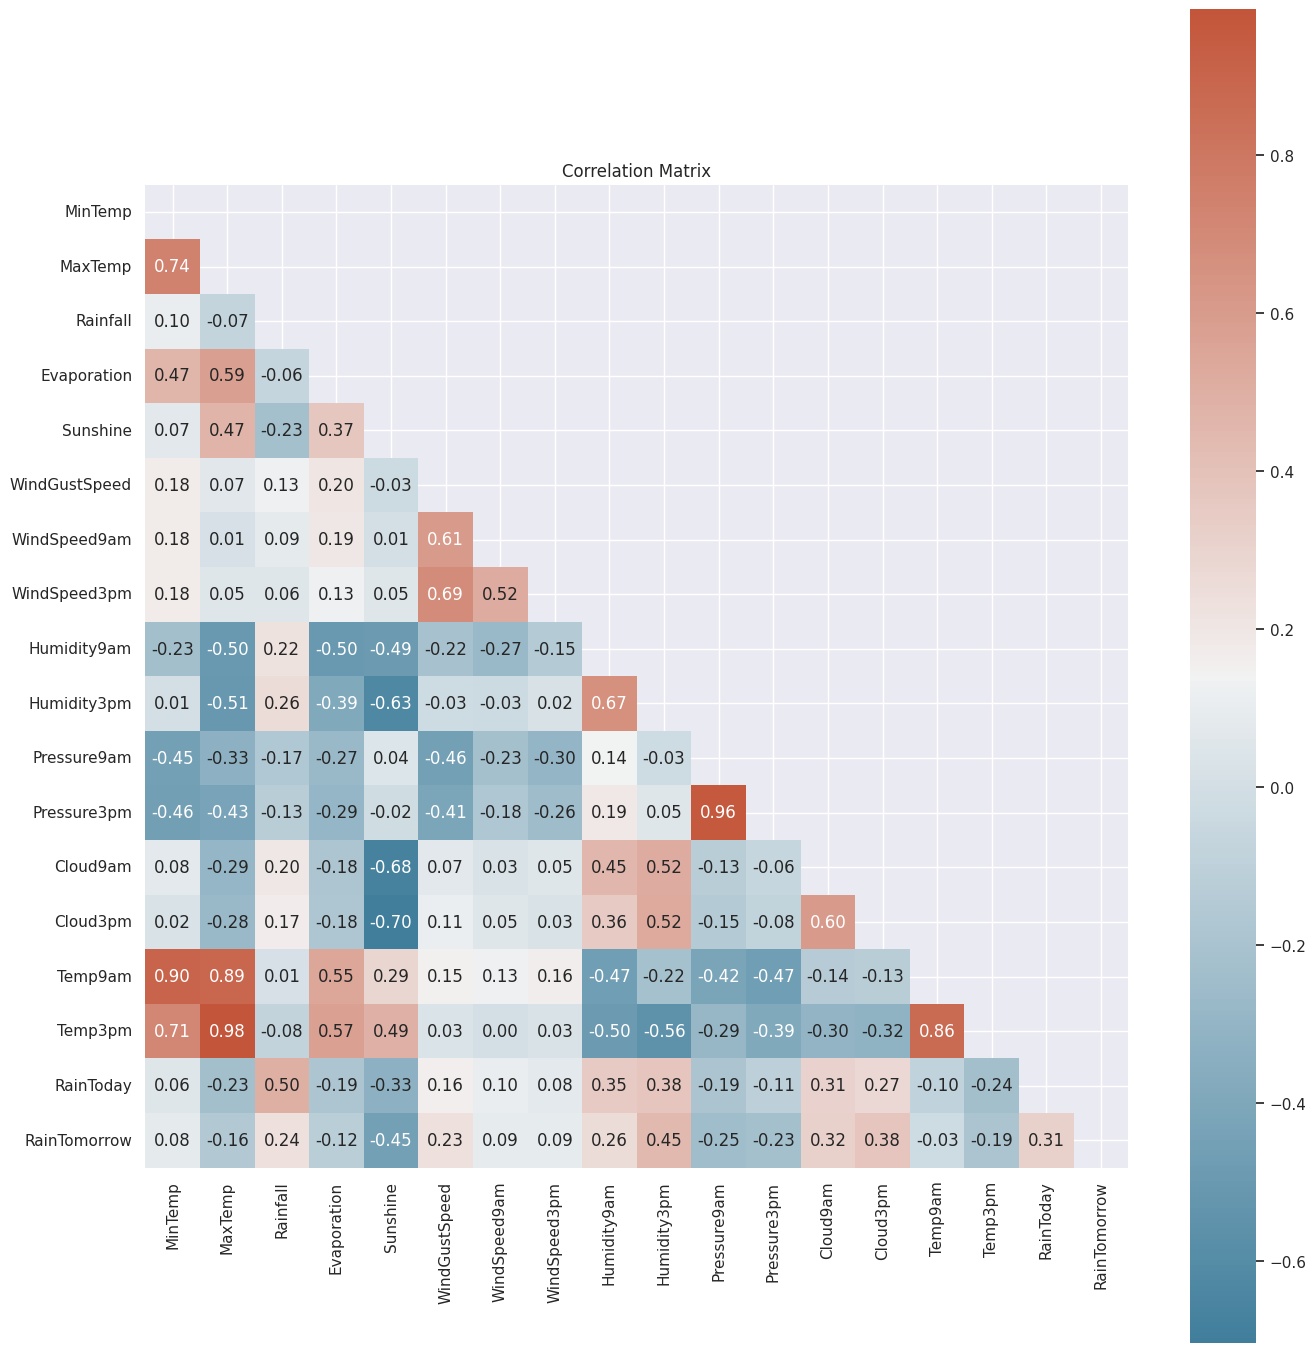

In [24]:
plt.figure(figsize=(14, 14))
plt.title('Correlation Matrix')

# Creating a mask to block the top right half of the heatmap (redundant information)
mask = np.triu(np.ones_like(df.corr()))

# Custom color map
cmap = sns.diverging_palette(230, 20, as_cmap=True)

sns.heatmap(df.corr(), mask=mask, annot=True, fmt='.2f', square=True, cmap=cmap)
plt.tight_layout()
plt.savefig('images/corr_heatmap.png', facecolor='white', dpi=100);

**Observations:**
- Nothing in this correlation heatmap is surprising
- Features with strong correlations (either positive or negative) have intuitive reasons for being so

# Data Preprocessing
---

## Missing Values
Kebutuhan prapemrosesan utama untuk kumpulan data ini adalah menangani nilai yang hilang. Mengingat korelasi yang kuat antara fitur-fitur tertentu, penggunaan metode imputasi fitur multivariat adalah hal yang masuk akal. Meskipun masih bersifat eksperimental, modul `IterativeImputer` dari `sklearn` sempurna untuk kasus penggunaan ini dan tampak cukup stabil. Modul ini...
> "...memodelkan setiap fitur dengan nilai yang hilang sebagai fungsi dari fitur lainnya, dan menggunakan estimasi tersebut untuk imputasi. Hal ini dilakukan dengan cara round-robin yang berulang: pada setiap langkah, kolom fitur ditetapkan sebagai keluaran y dan kolom fitur lainnya diperlakukan sebagai input X. Sebuah regressor cocok pada (X, y) untuk y yang diketahui. Kemudian, regressor digunakan untuk memprediksi nilai y yang hilang. Hal ini dilakukan untuk setiap fitur secara iteratif, dan kemudian diulang untuk putaran imputasi max_iter. Hasil putaran imputasi akhir dikembalikan."

Saya tidak ingin memperhitungkan nilai untuk variabel target (`RainTomorrow`) karena ini akan mengurangi kebenaran dasar dan berpotensi menimbulkan efek negatif pada model. Untuk memulai, saya akan menghapus baris yang tidak memiliki nilai `RainTomorrow`.

In [26]:
df_imputed = df.dropna(axis=0, subset=['RainTomorrow'])
df_imputed.isna().sum()

Date                 0
Location             0
MinTemp            637
MaxTemp            322
Rainfall          1406
Evaporation      60843
Sunshine         67816
WindGustDir       9330
WindGustSpeed     9270
WindDir9am       10013
WindDir3pm        3778
WindSpeed9am      1348
WindSpeed3pm      2630
Humidity9am       1774
Humidity3pm       3610
Pressure9am      14014
Pressure3pm      13981
Cloud9am         53657
Cloud3pm         57094
Temp9am            904
Temp3pm           2726
RainToday         1406
RainTomorrow         0
dtype: int64

### Continuous Features
Untuk the continuous features, saya akan menerapkan
`IterativeImputer`.

In [27]:
cont_feats = [col for col in df_imputed.columns if df_imputed[col].dtype != object]
cont_feats.remove('RainTomorrow')
cont_feats

['MinTemp',
 'MaxTemp',
 'Rainfall',
 'Evaporation',
 'Sunshine',
 'WindGustSpeed',
 'WindSpeed9am',
 'WindSpeed3pm',
 'Humidity9am',
 'Humidity3pm',
 'Pressure9am',
 'Pressure3pm',
 'Cloud9am',
 'Cloud3pm',
 'Temp9am',
 'Temp3pm',
 'RainToday']

In [28]:
imputer = IterativeImputer(random_state=42)
df_imputed_cont = imputer.fit_transform(df_imputed[cont_feats])
df_imputed_cont = pd.DataFrame(df_imputed_cont, columns=cont_feats)
df_imputed_cont.head()

,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustSpeed,WindSpeed9am,WindSpeed3pm,Humidity9am,Humidity3pm,Pressure9am,Pressure3pm,Cloud9am,Cloud3pm,Temp9am,Temp3pm,RainToday
0,13.4,22.9,0.6,6.497888,7.048211,44.0,20.0,24.0,71.0,22.0,1007.7,1007.1,8.000000,5.103048,16.9,21.8,0.0
1,7.4,25.1,0.0,6.270412,10.863393,44.0,4.0,22.0,44.0,25.0,1010.6,1007.8,1.912027,2.640581,17.2,24.3,0.0
2,12.9,25.7,0.0,8.659380,11.812408,46.0,19.0,26.0,38.0,30.0,1007.6,1008.7,2.014404,2.000000,21.0,23.2,0.0
3,9.2,28.0,0.0,6.764941,11.542532,24.0,11.0,9.0,45.0,16.0,1017.6,1012.8,1.201990,1.993914,18.1,26.5,0.0
4,17.5,32.3,1.0,7.455971,5.520080,41.0,7.0,20.0,82.0,33.0,1010.8,1006.0,7.000000,8.000000,17.8,29.7,0.0


In [29]:
df_imputed_cont.isna().sum()

MinTemp          0
MaxTemp          0
Rainfall         0
Evaporation      0
Sunshine         0
WindGustSpeed    0
WindSpeed9am     0
WindSpeed3pm     0
Humidity9am      0
Humidity3pm      0
Pressure9am      0
Pressure3pm      0
Cloud9am         0
Cloud3pm         0
Temp9am          0
Temp3pm          0
RainToday        0
dtype: int64

### Categorical Features
Untuk fitur kategorikal, saya akan mengganti nilai yang hilang dengan opsi yang dipilih secara acak dari nilai unik setiap fitur sesuai dengan distribusi probabilitasnya.

In [30]:
cat_feats = [col for col in df_imputed.columns if col not in cont_feats]
cat_feats.remove('RainTomorrow')

# Also removing Date and Location since no values are missing
cat_feats.remove('Date')
cat_feats.remove('Location')
cat_feats

['WindGustDir', 'WindDir9am', 'WindDir3pm']

In [31]:
df_imputed_cat = df_imputed[cat_feats]

for col in df_imputed_cat.columns:
    values = df_imputed_cat.WindDir3pm.value_counts().reset_index()['index'].values
    probs = df_imputed_cat[col].value_counts(normalize=True).values
    df_imputed_cat[col].replace(np.nan, np.random.choice(a=values, p=probs), inplace=True)

df_imputed_cat.head()

,WindGustDir,WindDir9am,WindDir3pm
0,W,W,WNW
1,WNW,NNW,WSW
2,WSW,W,WSW
3,NE,SE,E
4,W,ENE,NW


In [32]:
df_imputed_cat.isna().sum()

WindGustDir    0
WindDir9am     0
WindDir3pm     0
dtype: int64

### Penggabungan
Setelah nilai yang hilang telah ditangani, saya perlu menempatkan semua dataframe yang terpisah kembali ke dalam satu dataframe akhir.

In [33]:
df_date_loc = df_imputed[['Date', 'Location']]
df_target = df_imputed.RainTomorrow

print(df_date_loc.shape)
print(df_imputed_cont.shape)
print(df_imputed_cat.shape)
print(df_target.shape)

(142193, 2)
(142193, 17)
(142193, 3)
(142193,)


In [34]:
df_imputed_final = pd.concat(objs=[df_date_loc.reset_index(drop=True),
                                   df_imputed_cont.reset_index(drop=True),
                                   df_imputed_cat.reset_index(drop=True),
                                   df_target.reset_index(drop=True)
                                  ],
                             axis=1
                            )
df_imputed_final.shape

(142193, 23)

In [35]:
df_imputed_final.head()

,Date,Location,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustSpeed,WindSpeed9am,WindSpeed3pm,...,Pressure3pm,Cloud9am,Cloud3pm,Temp9am,Temp3pm,RainToday,WindGustDir,WindDir9am,WindDir3pm,RainTomorrow
0,2008-12-01,Albury,13.4,22.9,0.6,6.497888,7.048211,44.0,20.0,24.0,...,1007.1,8.000000,5.103048,16.9,21.8,0.0,W,W,WNW,0.0
1,2008-12-02,Albury,7.4,25.1,0.0,6.270412,10.863393,44.0,4.0,22.0,...,1007.8,1.912027,2.640581,17.2,24.3,0.0,WNW,NNW,WSW,0.0
2,2008-12-03,Albury,12.9,25.7,0.0,8.659380,11.812408,46.0,19.0,26.0,...,1008.7,2.014404,2.000000,21.0,23.2,0.0,WSW,W,WSW,0.0
3,2008-12-04,Albury,9.2,28.0,0.0,6.764941,11.542532,24.0,11.0,9.0,...,1012.8,1.201990,1.993914,18.1,26.5,0.0,NE,SE,E,0.0
4,2008-12-05,Albury,17.5,32.3,1.0,7.455971,5.520080,41.0,7.0,20.0,...,1006.0,7.000000,8.000000,17.8,29.7,0.0,W,ENE,NW,0.0


Melakukan pemeriksaan cepat untuk memastikan semua nilai yang hilang telah ditangani:

In [36]:
df_imputed_final.isna().sum()

Date             0
Location         0
MinTemp          0
MaxTemp          0
Rainfall         0
Evaporation      0
Sunshine         0
WindGustSpeed    0
WindSpeed9am     0
WindSpeed3pm     0
Humidity9am      0
Humidity3pm      0
Pressure9am      0
Pressure3pm      0
Cloud9am         0
Cloud3pm         0
Temp9am          0
Temp3pm          0
RainToday        0
WindGustDir      0
WindDir9am       0
WindDir3pm       0
RainTomorrow     0
dtype: int64

## Extracting the Month
Seperti yang terlihat pada bagian EDA, curah hujan di Australia menunjukkan musim. Daripada menggunakan tanggal lengkap dari kolom `Tanggal`, mengekstrak bulannya saja akan jauh lebih berharga.

In [37]:
df_month = df_imputed_final.copy()
df_month.insert(1, 'Month', df_month.Date.apply(lambda x: int(str(x)[5:7])))
df_month.drop(columns='Date', inplace=True)
df_month.head()

,Month,Location,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustSpeed,WindSpeed9am,WindSpeed3pm,...,Pressure3pm,Cloud9am,Cloud3pm,Temp9am,Temp3pm,RainToday,WindGustDir,WindDir9am,WindDir3pm,RainTomorrow
0,12,Albury,13.4,22.9,0.6,6.497888,7.048211,44.0,20.0,24.0,...,1007.1,8.000000,5.103048,16.9,21.8,0.0,W,W,WNW,0.0
1,12,Albury,7.4,25.1,0.0,6.270412,10.863393,44.0,4.0,22.0,...,1007.8,1.912027,2.640581,17.2,24.3,0.0,WNW,NNW,WSW,0.0
2,12,Albury,12.9,25.7,0.0,8.659380,11.812408,46.0,19.0,26.0,...,1008.7,2.014404,2.000000,21.0,23.2,0.0,WSW,W,WSW,0.0
3,12,Albury,9.2,28.0,0.0,6.764941,11.542532,24.0,11.0,9.0,...,1012.8,1.201990,1.993914,18.1,26.5,0.0,NE,SE,E,0.0
4,12,Albury,17.5,32.3,1.0,7.455971,5.520080,41.0,7.0,20.0,...,1006.0,7.000000,8.000000,17.8,29.7,0.0,W,ENE,NW,0.0


## Dummy Variables
Semua fitur kategorikal sekarang harus diubah menjadi variabel dummy agar dapat digunakan di bagian pemodelan.

In [38]:
categoricals = ['Month', 'Location', 'WindGustDir', 'WindDir9am', 'WindDir3pm']
df_dummies = pd.get_dummies(df_month, columns=categoricals)
df_dummies.head()

,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustSpeed,WindSpeed9am,WindSpeed3pm,Humidity9am,Humidity3pm,...,WindDir3pm_NNW,WindDir3pm_NW,WindDir3pm_S,WindDir3pm_SE,WindDir3pm_SSE,WindDir3pm_SSW,WindDir3pm_SW,WindDir3pm_W,WindDir3pm_WNW,WindDir3pm_WSW
0,13.4,22.9,0.6,6.497888,7.048211,44.0,20.0,24.0,71.0,22.0,...,0,0,0,0,0,0,0,0,1,0
1,7.4,25.1,0.0,6.270412,10.863393,44.0,4.0,22.0,44.0,25.0,...,0,0,0,0,0,0,0,0,0,1
2,12.9,25.7,0.0,8.659380,11.812408,46.0,19.0,26.0,38.0,30.0,...,0,0,0,0,0,0,0,0,0,1
3,9.2,28.0,0.0,6.764941,11.542532,24.0,11.0,9.0,45.0,16.0,...,0,0,0,0,0,0,0,0,0,0
4,17.5,32.3,1.0,7.455971,5.520080,41.0,7.0,20.0,82.0,33.0,...,0,1,0,0,0,0,0,0,0,0


In [39]:
df_dummies.columns

Index(['MinTemp', 'MaxTemp', 'Rainfall', 'Evaporation', 'Sunshine',
       'WindGustSpeed', 'WindSpeed9am', 'WindSpeed3pm', 'Humidity9am',
       'Humidity3pm',
       ...
       'WindDir3pm_NNW', 'WindDir3pm_NW', 'WindDir3pm_S', 'WindDir3pm_SE',
       'WindDir3pm_SSE', 'WindDir3pm_SSW', 'WindDir3pm_SW', 'WindDir3pm_W',
       'WindDir3pm_WNW', 'WindDir3pm_WSW'],
      dtype='object', length=127)

# Pembuatan Model
---

In [40]:
df_final = df_dummies.copy()
X = df_final.drop(columns='RainTomorrow')
y = df_final.RainTomorrow

X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=42)

print('Train size:', X_train.shape[0])
print('Test size: ', X_test.shape[0])

Train size: 106644
Test size:  35549


## Logistic Regression

In [41]:
logreg = LogisticRegression(random_state=42)
logreg.fit(X_train, y_train)
y_pred = logreg.predict(X_test)
y_pred

array([1., 0., 0., ..., 0., 1., 0.])

In [42]:
from sklearn.metrics import classification_report, ConfusionMatrixDisplay
from sklearn.metrics import RocCurveDisplay

Confusion Matrix
-----------------------------------------------------


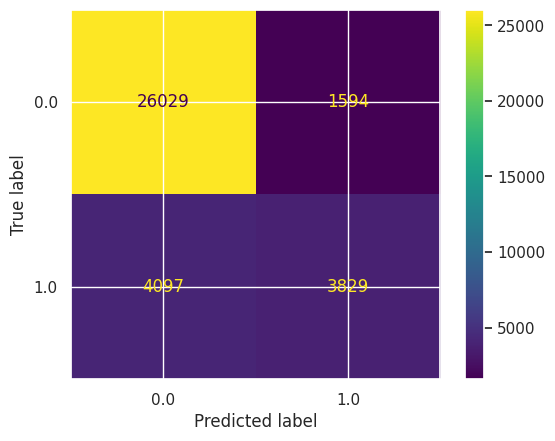

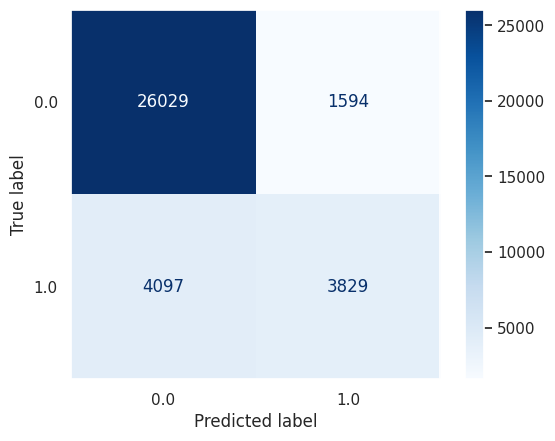



Classification Report
-----------------------------------------------------
              precision    recall  f1-score   support

         0.0       0.86      0.94      0.90     27623
         1.0       0.71      0.48      0.57      7926

    accuracy                           0.84     35549
   macro avg       0.79      0.71      0.74     35549
weighted avg       0.83      0.84      0.83     35549



ROC Curve
-----------------------------------------------------


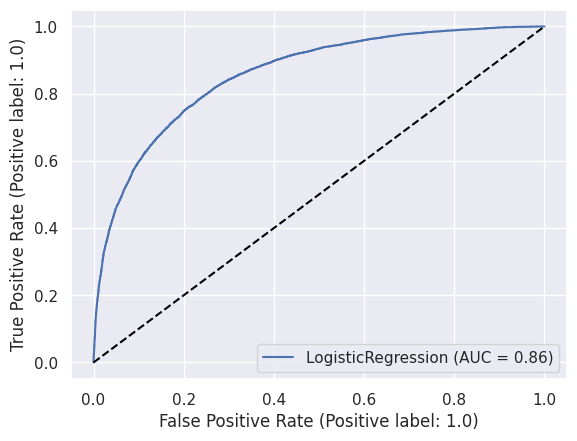



Checking model fitness
-----------------------------------------------------
Train score: 0.8425
Test score:  0.8399




In [43]:
def conf_matrix(model, X_test, y_test, cmap='Blues'):
    y_pred = model.predict(X_test)
    cm_display = ConfusionMatrixDisplay.from_predictions(y_test, y_pred)
    cm_display.plot(cmap=cmap)
    plt.grid()
    plt.show()

def roc_curve_custom(model, X_test, y_test):
    RocCurveDisplay.from_estimator(model, X_test, y_test)
    plt.plot([0, 1], [0, 1], color='black', linestyle='--')
    plt.show()

def evaluate(model, X_test=X_test, y_train=y_train, y_test=y_test, y_pred=y_pred):
    # Confusion Matrix
    print('Confusion Matrix')
    print('-'*53)
    conf_matrix(model, X_test, y_test)
    print('\n')

    # Classification Report
    print('Classification Report')
    print('-'*53)
    print(classification_report(y_test, y_pred))
    print('\n')

    # ROC Curve
    print('ROC Curve')
    print('-'*53)
    roc_curve_custom(model, X_test, y_test)
    print('\n')

    # Checking model fitness
    print('Checking model fitness')
    print('-'*53)
    print('Train score:', round(model.score(X_train, y_train), 4))
    print('Test score: ', round(model.score(X_test, y_test), 4))
    print('\n')

evaluate(logreg)

**Pengamatan:**
- Performa yang layak untuk model dasar
- Daya ingat adalah titik terlemah, terutama untuk hari-hari di mana besok akan turun hujan
- Model ini sangat cocok, dengan nilai latihan dan tes yang kurang lebih sama

### Mengoreksi Ketidakseimbangan Kelas
Ketidakseimbangan kelas saat ini ada untuk variabel target. Mengoreksi hal ini dapat membantu meningkatkan performa model. Untuk melakukannya, saya akan mengambil sampel ulang data pelatihan menggunakan `SMOTE`.

In [44]:
X_train_resampled, y_train_resampled = SMOTE().fit_resample(X_train, y_train)

print('Original')
print('-'*20)
print(y_train.value_counts())
print('\n')
print('SMOTE')
print('-'*20)
print(pd.Series(y_train_resampled).value_counts())

Original
--------------------
0.0    82693
1.0    23951
Name: RainTomorrow, dtype: int64


SMOTE
--------------------
0.0    82693
1.0    82693
Name: RainTomorrow, dtype: int64


In [45]:
logreg_smote = LogisticRegression(random_state=42)
logreg_smote.fit(X_train_resampled, y_train_resampled)
y_pred_smote = logreg_smote.predict(X_test)
y_pred_smote

array([1., 1., 0., ..., 0., 1., 1.])

In [46]:
from sklearn.metrics import RocCurveDisplay

Confusion Matrix
-----------------------------------------------------


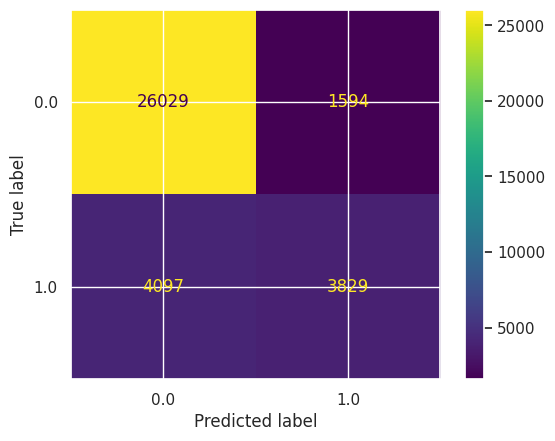

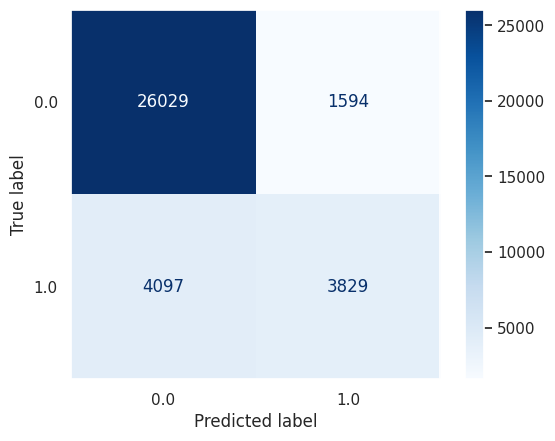



Classification Report
-----------------------------------------------------
              precision    recall  f1-score   support

         0.0       0.86      0.94      0.90     27623
         1.0       0.71      0.48      0.57      7926

    accuracy                           0.84     35549
   macro avg       0.79      0.71      0.74     35549
weighted avg       0.83      0.84      0.83     35549



ROC Curve
-----------------------------------------------------


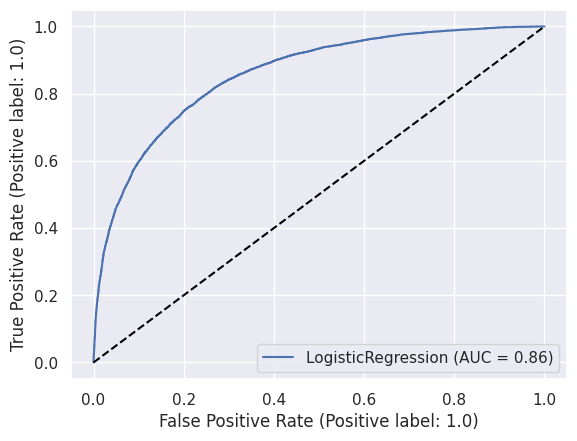



Checking model fitness
-----------------------------------------------------
Train score: 0.8425
Test score:  0.8399




In [47]:
def conf_matrix(model, X_test, y_test, cmap='Blues'):
    y_pred = model.predict(X_test)
    cm_display = ConfusionMatrixDisplay.from_predictions(y_test, y_pred)
    cm_display.plot(cmap=cmap)
    plt.grid()
    plt.show()

def roc_curve_custom(model, X_test, y_test):
    RocCurveDisplay.from_estimator(model, X_test, y_test)
    plt.plot([0, 1], [0, 1], color='black', linestyle='--')
    plt.show()

def evaluate(model, X_test=X_test, y_train=y_train, y_test=y_test, y_pred=y_pred):
    # Confusion Matrix
    print('Confusion Matrix')
    print('-'*53)
    conf_matrix(model, X_test, y_test)
    print('\n')

    # Classification Report
    print('Classification Report')
    print('-'*53)
    print(classification_report(y_test, y_pred))
    print('\n')

    # ROC Curve
    print('ROC Curve')
    print('-'*53)
    roc_curve_custom(model, X_test, y_test)
    print('\n')

    # Checking model fitness
    print('Checking model fitness')
    print('-'*53)
    print('Train score:', round(model.score(X_train, y_train), 4))
    print('Test score: ', round(model.score(X_test, y_test), 4))
    print('\n')

evaluate(logreg)

**Pengamatan:**
- Meskipun ada sedikit peningkatan pada skor F1 positif, akurasi model ini menurun tajam
- Model ini tetap cocok dengan baik tetapi skor untuk set latih dan set uji menurun
- Berlawanan dengan pemikiran awal saya, yang dimana menggunakan `SMOTE` ternyata memiliki performa yang lebih buruk dan tidak akan digunakan pada iterasi selanjutnya

### Hyperparameter Tuning

In [48]:
logreg_params = {
    'C': [1, 1e8, 1e16],
    'fit_intercept': [True, False],
    'max_iter': [50, 100, 150],
    'random_state': [42]
}

logreg_gs = GridSearchCV(logreg, logreg_params, scoring='accuracy', cv=3)
logreg_gs.fit(X_train, y_train)

GridSearchCV(cv=3, estimator=LogisticRegression(random_state=42),
             param_grid={'C': [1, 100000000.0, 1e+16],
                         'fit_intercept': [True, False],
                         'max_iter': [50, 100, 150], 'random_state': [42]},
             scoring='accuracy')

Banyaknya waktu yang diperlukan untuk menjalankan grid search, saya akan menggunakan pustaka `joblib` untuk menyimpannya ke sebuah file agar mudah diakses tanpa harus menjalankan kembali seluruh proses pelatihan.

In [49]:
joblib.dump(logreg_gs, 'saved_models/logreg_gs.joblib')

['saved_models/logreg_gs.joblib']

In [50]:
logreg_gs = joblib.load('saved_models/logreg_gs.joblib')

In [51]:
logreg_gs.best_params_

{'C': 1, 'fit_intercept': False, 'max_iter': 150, 'random_state': 42}

In [52]:
round(logreg_gs.best_score_, 4)

0.8436

In [53]:
y_pred_logreg_gs = logreg_gs.predict(X_test)
y_pred_logreg_gs

array([1., 0., 0., ..., 0., 1., 0.])

Confusion Matrix
-----------------------------------------------------


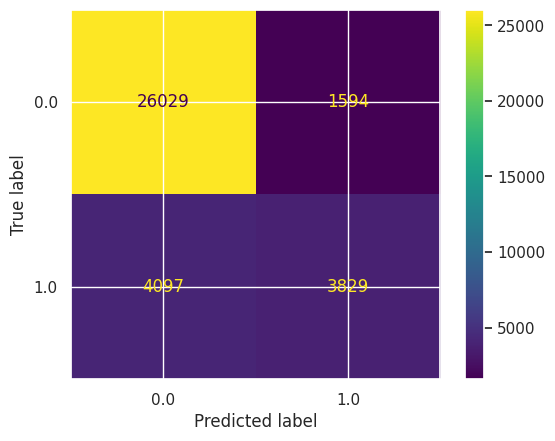

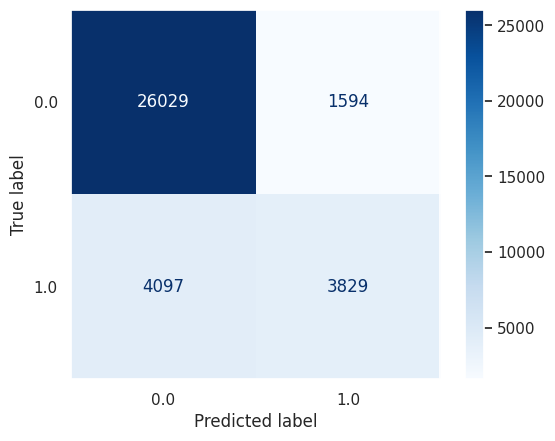



Classification Report
-----------------------------------------------------
              precision    recall  f1-score   support

         0.0       0.86      0.94      0.90     27623
         1.0       0.71      0.48      0.57      7926

    accuracy                           0.84     35549
   macro avg       0.79      0.71      0.74     35549
weighted avg       0.83      0.84      0.83     35549



ROC Curve
-----------------------------------------------------


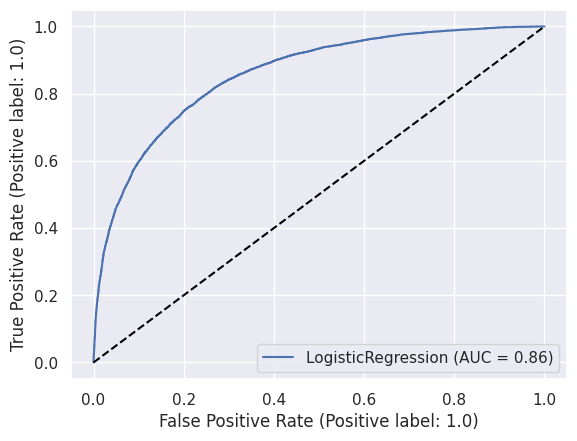



Checking model fitness
-----------------------------------------------------
Train score: 0.8425
Test score:  0.8399




In [54]:
evaluate(logreg, X_test, y_train, y_test)

**Pengamatan:**
- Sedikit peningkatan dalam hal presisi dan kesesuaian model
- Secara keseluruhan, tidak banyak perbaikan dibandingkan model logreg dasar

## Decision Tree

In [66]:
clf = DecisionTreeClassifier(random_state=42)
clf.fit(X_train, y_train)
y_pred_tree = clf.predict(X_test)
y_pred_tree

array([1., 1., 0., ..., 0., 0., 0.])

Confusion Matrix
-----------------------------------------------------


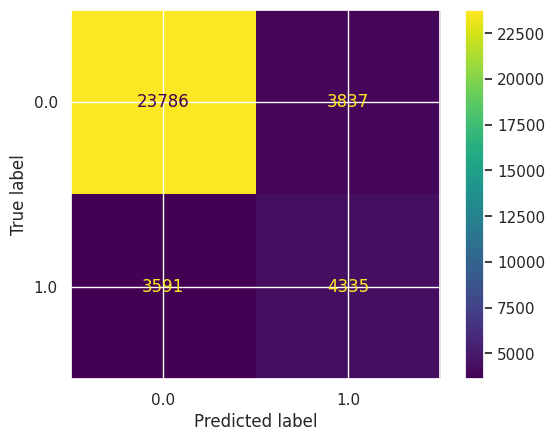

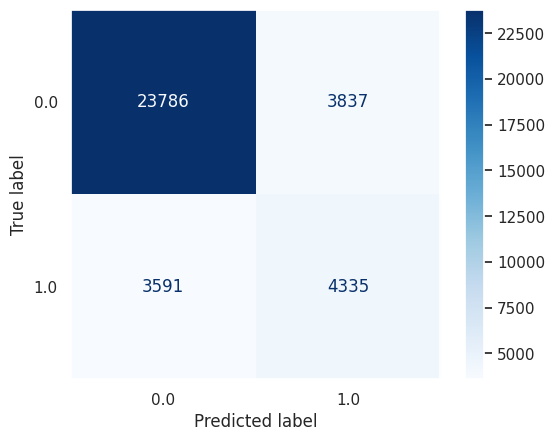



Classification Report
-----------------------------------------------------
              precision    recall  f1-score   support

         0.0       0.87      0.86      0.86     27623
         1.0       0.53      0.55      0.54      7926

    accuracy                           0.79     35549
   macro avg       0.70      0.70      0.70     35549
weighted avg       0.79      0.79      0.79     35549



ROC Curve
-----------------------------------------------------


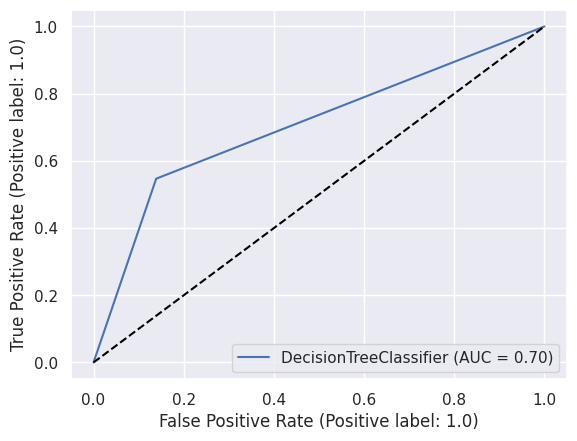



Checking model fitness
-----------------------------------------------------
Train score: 1.0
Test score:  0.791




In [67]:
evaluate(clf, y_pred=y_pred_tree)

**Pengamatan:**
- Akurasi lebih rendah daripada model regresi logistik yang disetel
- Model ini overfit, yang ditunjukkan dengan nilai yang jauh lebih tinggi untuk data latih dibandingkan dengan data uji

### Hyperparameter Tuning

In [68]:
params = {
    'criterion': ['gini', 'entropy'],
    'max_depth': [3, 7, 11],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 3, 5],
    'random_state': [42]
}

clf_gs = GridSearchCV(clf, param_grid=params, scoring='accuracy', cv=3)
clf_gs.fit(X_train, y_train)

GridSearchCV(cv=3, estimator=DecisionTreeClassifier(random_state=42),
             param_grid={'criterion': ['gini', 'entropy'],
                         'max_depth': [3, 7, 11], 'min_samples_leaf': [1, 3, 5],
                         'min_samples_split': [2, 5, 10],
                         'random_state': [42]},
             scoring='accuracy')

Menyimpan **grid search** ke sebuah file agar mudah diakses:

In [69]:
joblib.dump(clf_gs, 'saved_models/clf_gs.joblib')

['saved_models/clf_gs.joblib']

In [70]:
clf_gs = joblib.load('saved_models/clf_gs.joblib')

In [71]:
clf_gs.best_params_

{'criterion': 'gini',
 'max_depth': 7,
 'min_samples_leaf': 3,
 'min_samples_split': 10,
 'random_state': 42}

In [72]:
round(clf_gs.best_score_, 4)

0.8414

In [73]:
y_pred_tree_gs = clf_gs.best_estimator_.predict(X_test)
y_pred_tree_gs

array([1., 1., 0., ..., 0., 0., 1.])

Confusion Matrix
-----------------------------------------------------


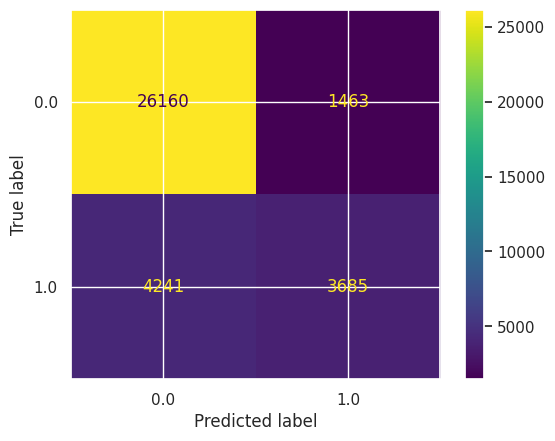

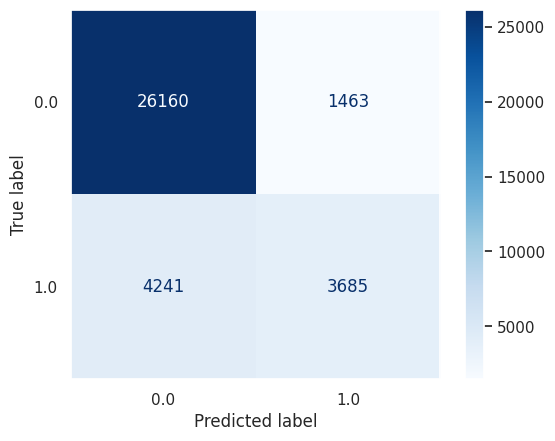



Classification Report
-----------------------------------------------------
              precision    recall  f1-score   support

         0.0       0.86      0.95      0.90     27623
         1.0       0.72      0.46      0.56      7926

    accuracy                           0.84     35549
   macro avg       0.79      0.71      0.73     35549
weighted avg       0.83      0.84      0.83     35549



ROC Curve
-----------------------------------------------------


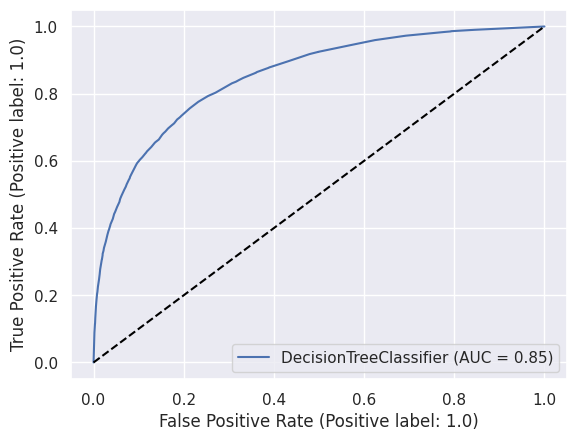



Checking model fitness
-----------------------------------------------------
Train score: 0.8475
Test score:  0.8395




In [74]:
evaluate(clf_gs.best_estimator_, y_pred=y_pred_tree_gs)

**Pengamatan:**
- Peningkatan yang solid dalam metrik evaluasi
- Model yang disetel jauh lebih baik daripada model dasar sebelumnya

# Perbandingan Model Regresi Linear dan Decission Tree

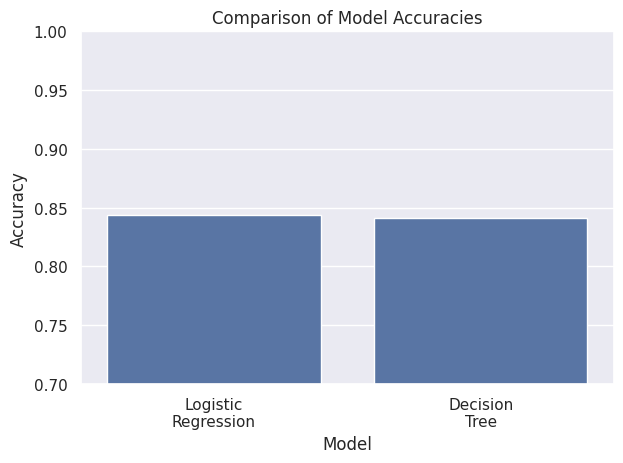

In [75]:
models = [logreg_gs, clf_gs]

sns.barplot(x=['Logistic\nRegression', 'Decision\nTree'],
            y=[model.best_score_ for model in models]
           )
plt.xlabel('Model')
plt.ylabel('Accuracy')
plt.ylim(0.7, 1.0)
plt.title('Comparison of Model Accuracies')
plt.tight_layout()
plt.savefig('images/model_accuracies.png', facecolor='white', dpi=100);

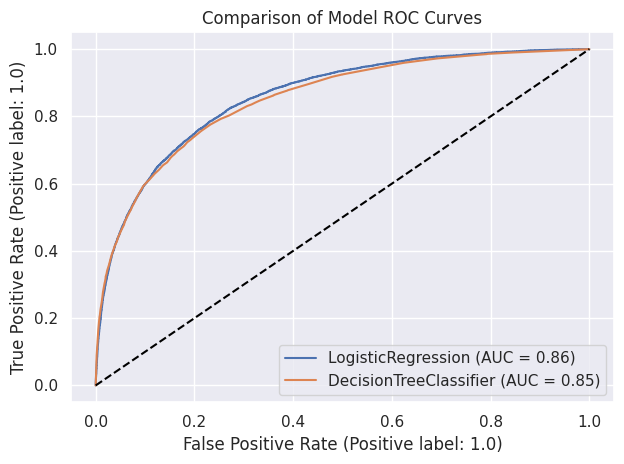

In [76]:
fig, ax = plt.subplots()
for model in models:
    RocCurveDisplay.from_estimator(model,
                   X_test,
                   y_test,
                   name=type(model.best_estimator_).__name__,
                   ax=ax
                  )
plt.plot([0, 1], [0, 1], color='black', linestyle='--')
plt.title('Comparison of Model ROC Curves')
plt.tight_layout()
plt.savefig('images/model_roc_curves.png', facecolor='white', dpi=100);

# Results
Model berperforma terbaik adalah model **Logistic Regression** yang disesuaikan dengan hyperparameter dengan akurasi test score sekitar 0.8425%. sedangkan Random Forest mendapat akurasi 0.8395%.

**SELESAI**